# Interpolation functions

## Junior mentor:

Y. Fabian Bautista

## Objectives of the tutorial
1. Differentiate between interpolating functions and curve fitting 
2. Create 1-D interpolations
3. Identify the diferente types of 1-D interpolating functions


### Curve fitting


In Tutorial 2 part a, we learned that fitting a curve to a set of data means to find the curve that better describes most of the data points. However, the fitted curve does not passes  throught all of data points.

In [1]:
from IPython import display

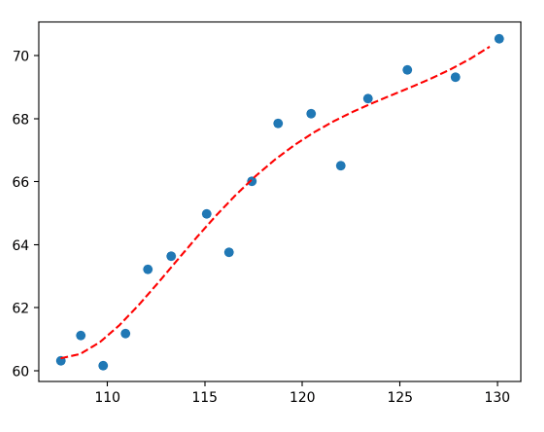

In [2]:

display.Image("./fit.png")

### Interpolation

Given a set of data points $(x_i,f_i)$, with $x_{min} \le x_i\le x_{max}$, an interpolation function $ f(x)$ is a curve that passes throught all of the data points available in the data set. Once we have found the interpolation functions,  we can evaluate it at different locations $f(x')$, with $x_{min} \le x'\le x_{max}$,  i.e. it can only be evaluated in the iterval $[x_{min}, x_{max}]$

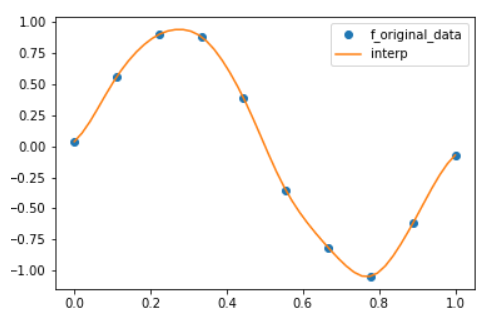

In [3]:

display.Image("./interp.png")

# Example 1: Basic 1-D interpolation

For this example we use the function <code>interp1d </code>, contained inside the  <code> scipy.interpolate </code>  <a https="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d"> library </a>

In [4]:
import numpy as np # For maths
from scipy.interpolate import interp1d # For 1-D interpolations
import matplotlib.pyplot as plt # For ploting

### 1. Let us create some data points

In [5]:
x = np.linspace(0,10,15)
y = np.exp(-x/2)

In [6]:
x

array([ 0.        ,  0.71428571,  1.42857143,  2.14285714,  2.85714286,
        3.57142857,  4.28571429,  5.        ,  5.71428571,  6.42857143,
        7.14285714,  7.85714286,  8.57142857,  9.28571429, 10.        ])

In [7]:
y

array([1.        , 0.69967254, 0.48954166, 0.34251886, 0.23965104,
       0.16767725, 0.11731917, 0.082085  , 0.05743262, 0.04018403,
       0.02811566, 0.01967175, 0.01376379, 0.00963014, 0.00673795])

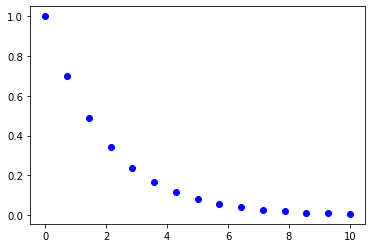

In [8]:
plt.plot(x,y,"bo")
plt.show()

### 2. Do the interpolation

In [9]:
interp1d?

In [10]:
f = interp1d(x,y)

In [11]:
type(f)

scipy.interpolate.interpolate.interp1d

In [12]:
f(3.4)

array(0.18495096)

Let us generate a diferent set of x-values

In [13]:
xnew = np.linspace(0,10, 8)

In [14]:
xnew

array([ 0.        ,  1.42857143,  2.85714286,  4.28571429,  5.71428571,
        7.14285714,  8.57142857, 10.        ])

Plot the interpolating function

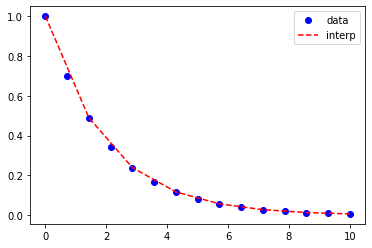

In [15]:
plt.plot(x,y,'bo',label = "data")
plt.plot(xnew,f(xnew),'r--',label = "interp")
plt.legend(loc = "upper right")
plt.show()

In [ ]:
py.legend?

# Types of 1-D interpolating functions

The default value for <code>kind</code> of interpolation is <code>"linear" </code>

In [17]:
interp1d?

Let us see the effect of the different types of interpolating functions 

### Create our data

In [18]:
x1 = np.linspace(0,10,11)
y1 = np.sin(x1) 
x1new = np.linspace(0,10,100) #New data to evaluate after the  interpolation is done


<IPython.core.display.Javascript object>


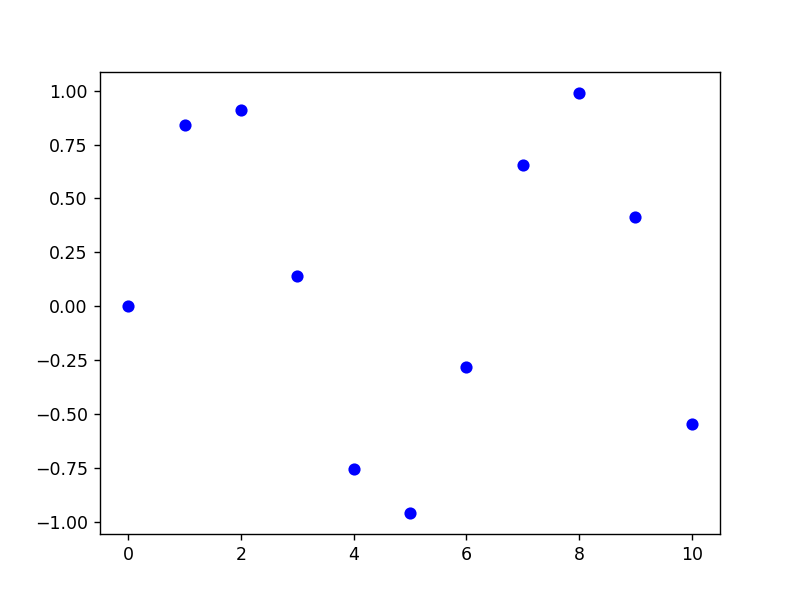

In [19]:
%matplotlib notebook
plt.plot(x1,y1,"bo",label = "data")

<IPython.core.display.Javascript object>


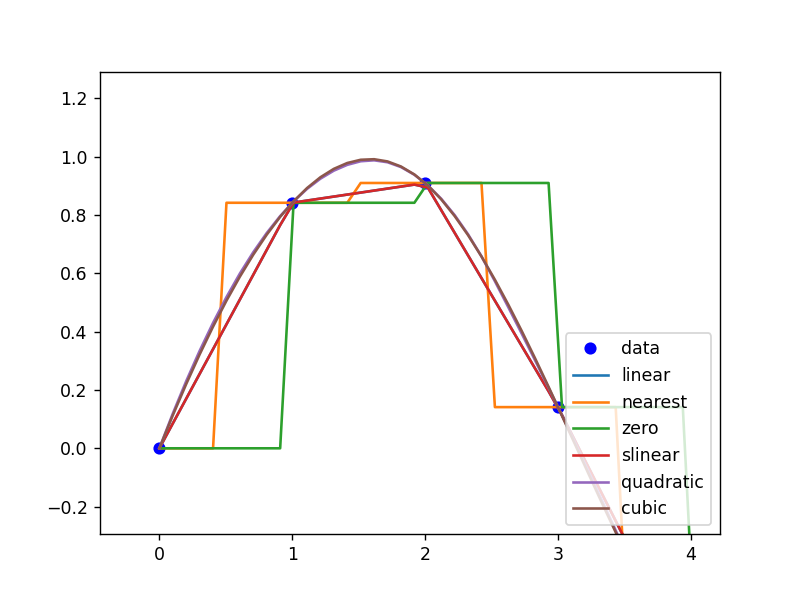

In [22]:
%matplotlib notebook
plt.plot(x1,y1,"bo",label = "data")
# Let us now do the interpolation for all the different kinds 
type_interp = ['linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic']


for kind in type_interp:
    f1 = interp1d(x1,y1,kind = kind)
    ynew = f1(x1new)
    plt.plot(x1new,ynew,label = kind)
plt.legend(loc = 'lower right')  
plt.show()

# Excercise

In this excercise we use interpolating functions to complete the tutorial on curve fitting from last week.  Let us divide it into different steps

1. Prepare the data: Choose your preferred galaxy and load the RotationCurve data, as well as the RotationCurve_baryons data. Create two data frames for the two different files

2. To have the data measured in the same r_grid, create an interpolating function for the stelar and gas velocities. (of course the data for radius to be used are the one given in the baryon file)

3. From the interpolating functions, compute the gas and stelar velocities, evaluated in the radius of the RotationCurve data frame
4. Add two new columns to the RotationCurve data frame, with the keywords  <code>"stars circ velocity (km/s) "</code> and <code> 'gas circ velocity (km/s)'</code> 

5. Add a new column to the  RotationCurve data frame, with the DM velocity, which is computed by $$v_{DM} = \sqrt{v_c^2-v_{star}^2-v_{gas}^2}.$$ Warning:  If a  given value of  $v_{DM}^2$ is  negative,  choose to change sign of $v_{gas}^2$ for the specific point, as explained in Footnote 1 in <a href='https://github.com/EXPLORE-for-students/python-tutorials/blob/main/Rotation%20curves/readme.pdf'> readme </a>.

6. Including errors: Add a new column to the  RotationCurve data frame which includes a systematic error in the measurements. As explained in    <a href='https://github.com/EXPLORE-for-students/python-tutorials/blob/main/Rotation%20curves/readme.pdf'> readme </a>, the error is given by the $5 \% $ of the last measured circular velocity point.

7. Add a new  column to the  RotationCurve data frame which computes the total error, which is the sum in quadrature of the systematic error, and the error in the measured velocities. 

The data frame should have the following aspect:




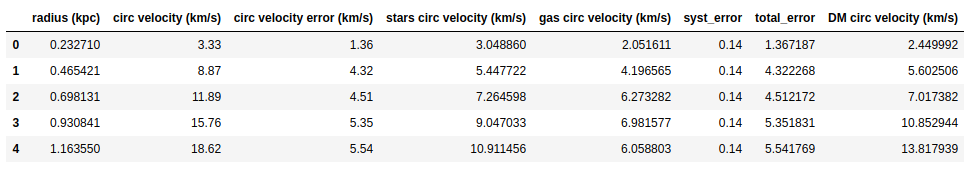

In [23]:
display.Image("./df.png")

8. Now that you have collected all the data, you can proceed to do the fit.  Fit the NFW and the Burkert profiles to the <code>DM circ velocity </code> data. Use the <code>total_error</code> for that. 
9. Compute the goodness of the fit for both the NFW and the Burkert fits.
10. Finally plot your findings 